In [117]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [118]:
df_MLE_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Machine Learning Engineer')].copy()

In [119]:
df_MLE_US = df_MLE_US.dropna(subset='salary_year_avg')

In [120]:
df_MLE_US_exploded = df_MLE_US.explode('job_skills')

In [121]:
df_MLE_skills = df_MLE_US_exploded.groupby(by='job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_MLE_skills = df_MLE_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_MLE_count = len(df_MLE_US)

df_MLE_skills['skill_percent'] = df_MLE_skills['skill_count'] / df_MLE_count *100

In [122]:
skill_percent = 10
df_MLE_skills = df_MLE_skills[df_MLE_skills['skill_percent'] > skill_percent]

In [123]:
df_MLE_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,83,150000.0,64.84375
tensorflow,48,150000.0,37.50000
pytorch,46,166000.0,35.93750
aws,34,154812.5,26.56250
java,33,166000.0,25.78125
sql,27,137388.5,21.09375
spark,21,172500.0,16.40625
r,19,137388.5,14.84375
go,17,166000.0,13.28125


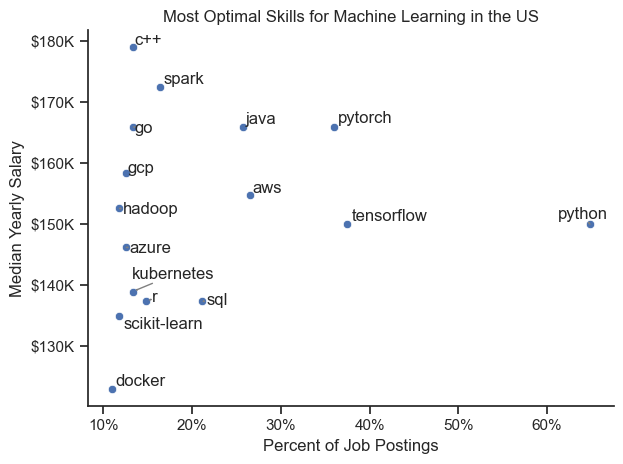

In [124]:
from adjustText import adjust_text

sns.scatterplot(data=df_MLE_skills, x='skill_percent', y='median_salary')
sns.despine()

texts = []
for i, txt in enumerate(df_MLE_skills.index):
    texts.append(plt.text(df_MLE_skills['skill_percent'].iloc[i], df_MLE_skills['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Percent of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Machine Learning in the US')

plt.tight_layout()
plt.show()

In [125]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technoogy_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technoogy_dict:
            technoogy_dict[key] += value
        else:
            technoogy_dict[key] = value

for key, value in technoogy_dict.items():
    technoogy_dict[key] = list(set(value))

technoogy_dict

{'analyst_tools': ['sharepoint',
  'esquisse',
  'tableau',
  'qlik',
  'word',
  'sas',
  'msaccess',
  'nuix',
  'datarobot',
  'dax',
  'microstrategy',
  'spreadsheet',
  'powerbi',
  'alteryx',
  'power bi',
  'cognos',
  'ssrs',
  'ms access',
  'excel',
  'sheets',
  'sap',
  'looker',
  'spss',
  'outlook',
  'powerpoint',
  'ssis',
  'splunk',
  'visio'],
 'programming': ['pascal',
  'cobol',
  'php',
  'javascript',
  'java',
  'bash',
  'sas',
  'swift',
  'c#',
  'visualbasic',
  'python',
  'powershell',
  'go',
  'vb.net',
  'f#',
  'kotlin',
  'crystal',
  'groovy',
  'html',
  'fortran',
  'clojure',
  'vba',
  'rust',
  'delphi',
  'mongo',
  'ruby',
  'apl',
  'dart',
  'objective-c',
  'elixir',
  'erlang',
  'ocaml',
  'css',
  'sql',
  'r',
  'scala',
  'golang',
  'lisp',
  'c',
  'assembly',
  'sass',
  'no-sql',
  'nosql',
  'julia',
  'perl',
  'typescript',
  't-sql',
  'haskell',
  'lua',
  'c++',
  'solidity',
  'matlab',
  'visual basic',
  'mongodb',
  'sh

In [126]:
df_technology = pd.DataFrame(list(technoogy_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sharepoint
0,analyst_tools,esquisse
0,analyst_tools,tableau
0,analyst_tools,qlik
0,analyst_tools,word
...,...,...
9,sync,webex
9,sync,symphony
9,sync,unify
9,sync,rocketchat


In [127]:
df_plot = df_MLE_skills.merge(df_technology, left_on='job_skills', right_on='skills')

In [128]:
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,83,150000.0,64.84375,programming,python
1,48,150000.0,37.50000,libraries,tensorflow
2,46,166000.0,35.93750,libraries,pytorch
3,34,154812.5,26.56250,cloud,aws
4,33,166000.0,25.78125,programming,java
5,27,137388.5,21.09375,programming,sql
6,21,172500.0,16.40625,libraries,spark
7,19,137388.5,14.84375,programming,r
8,17,166000.0,13.28125,programming,go
9,17,179000.0,13.28125,programming,c++


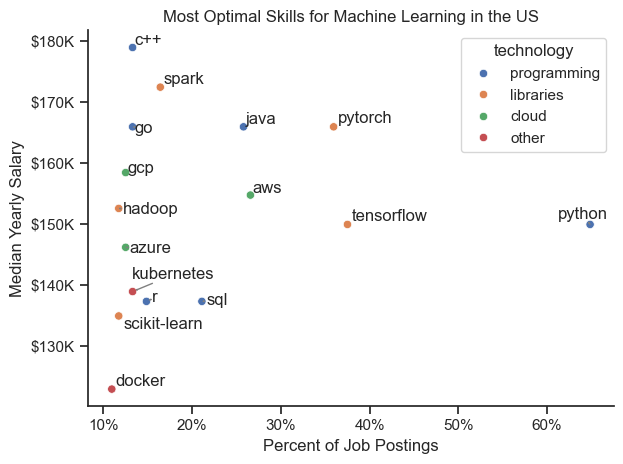

In [129]:
from adjustText import adjust_text

sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_plot['skills']):
    texts.append(plt.text(df_plot['skill_percent'].iloc[i], df_plot['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Percent of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Machine Learning in the US')

plt.tight_layout()
plt.show()